In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


data = pd.read_csv("Suicide_Detection.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data.head(10)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,Honetly idkI dont know what im even doing here...,suicide
6,[Trigger warning] Excuse for self inflicted bu...,suicide
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,My life is over at 20 years oldHello all. I am...,suicide


In [2]:
# Preprocess the data
X = data['text']
target = data['class']

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

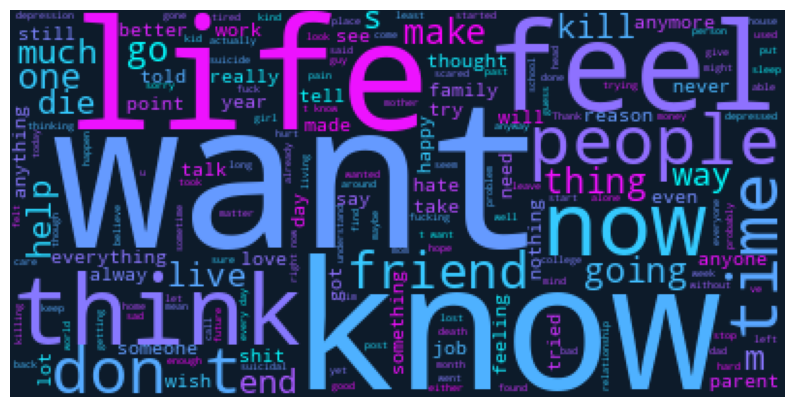

In [4]:
# Assuming 'data' is your DataFrame and it's already loaded
suicide = data[data['class'] == 'suicide']['text']
xsuicide = data[data['class'] == 'non-suicide']['text']

def display_cloud(data):
    # Use plt.figure instead of plt.subplots if only a single plot is needed
    plt.subplots(figsize=(10, 10))
    wc = WordCloud(
        background_color="#0d1b2a",
        colormap='cool_r',
        max_words=1000,
        random_state=101
    )
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

# Display word cloud for suicide texts
display_cloud(suicide)


In [5]:
# Lowercasing
data['text'] = data['text'].str.lower()

data['text'] = data['text'].str.replace("’", "'")

In [6]:
abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "im": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def expandContractions(text, abb_re=abb_re):
    def replace(match):
        return abb[match.group(0)]
    return abb_re.sub(replace, text)

data['text'] = data['text'].apply(expandContractions)

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the text column in the DataFrame
data['text'] = data['text'].apply(tokenize_text)

In [7]:
import pandas as pd
import wordninja
import re

# Apply word segmentation tot he 'text' column in the DataFrame
data['text'] = data['text'].apply(lambda tokens: wordninja.split(" ".join(tokens)))

In [8]:
from nltk.corpus import stopwords

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    tokens_without_stopwords = [
        token for token in tokens if token.lower() not in stop_words]
    return tokens_without_stopwords

# Function to remove punctuation from a list of tokens
def remove_punctuation(tokens):
    tokens_without_punctuation = [token for token in tokens if token.isalnum()]
    return tokens_without_punctuation

# Function to remove numbers from a list of tokens
def remove_numbers(tokens):
    tokens_without_numbers = [token for token in tokens if not token.isdigit()]
    return tokens_without_numbers

# Apply the functions to the text column in the DataFrame
data['text'] = data['text'].apply(remove_stopwords)
data['text'] = data['text'].apply(remove_punctuation)
data['text'] = data['text'].apply(remove_numbers)

In [9]:
# Function to remove extra whitespaces from each word in a list
def remove_whitespace(tokens):
    cleaned_tokens = [token.strip() for token in tokens]
    return cleaned_tokens

# Function to remove symbols and digits from each word in a list
def remove_symbols_digits(tokens):
    cleaned_tokens = [re.sub('[^a-zA-Z\s]', ' ', token) for token in tokens]
    return cleaned_tokens

# Function to remove special characters from each word in a list
def remove_special(tokens):
    cleaned_tokens = [token.replace("\r", " ").replace("\n", " ") for token in tokens]
    return cleaned_tokens

# Apply other preprocessing functions
data['text'] = data['text'].apply(remove_whitespace)
data['text'] = data['text'].apply(remove_symbols_digits)
data['text'] = data['text'].apply(remove_special)

In [10]:
# Function to remove URLs from a list of strings
def remove_url(tokens):
    cleaned_tokens = [re.sub(r'http\S+', '', token) for token in tokens]
    return cleaned_tokens

# Function to remove email addresses from a list of strings
def remove_mail(tokens):
    cleaned_tokens = [re.sub(r'\S+@\S+', '', token) for token in tokens]
    return cleaned_tokens

# Function to remove emojis from a list of strings
def remove_emoji(tokens):
    cleaned_tokens = [re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', token) for token in tokens]
    return cleaned_tokens

# Apply the functions to the 'text' column
data['text'] = data['text'].apply(remove_url)
data['text'] = data['text'].apply(remove_mail)
data['text'] = data['text'].apply(remove_emoji)

In [11]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'MultinomialNB': MultinomialNB(),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),

}

history = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train_vec))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_vec))
    
    print(f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    history[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
    }

# Plot the comparison
model_names = list(history.keys())
train_accuracies = [history[model]['train_accuracy'] for model in model_names]
test_accuracies = [history[model]['test_accuracy'] for model in model_names]

plt.bar(model_names, train_accuracies, alpha=0.6, label='Train Accuracy')
plt.bar(model_names, test_accuracies, alpha=0.6, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Training Logistic Regression...
Logistic Regression - Train Accuracy: 0.9407, Test Accuracy: 0.9354
Training Random Forest...
Random Forest - Train Accuracy: 0.9997, Test Accuracy: 0.8976
Training MultinomialNB...
MultinomialNB - Train Accuracy: 0.9040, Test Accuracy: 0.8999
Training GradientBoostingClassifier...
GradientBoostingClassifier - Train Accuracy: 0.8896, Test Accuracy: 0.8848
Training SVM...


In [12]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [15]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_vec, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vec, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train_vec, y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape=(5000,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec.toarray(), y_train, epochs=5, batch_size=128)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

# Tokenization and model loading
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

In [14]:
# Predict and evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9353528758895345
Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     38326
     suicide       0.94      0.93      0.93     38259

    accuracy                           0.94     76585
   macro avg       0.94      0.94      0.94     76585
weighted avg       0.94      0.94      0.94     76585

